In [1]:
import torch
import numpy as np
%load_ext autoreload
%autoreload 2
from digital_twin import DigitalTwin
from clust_huge_amp import AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest
# Load your trained model
# Replace this with your actual model loading code
model_path = '/Users/sarahurbut/Dropbox/resultshighamp/results/output_0_10000/model.pt'
checkpoint = torch.load(model_path)


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_56868/1952464316.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


In [2]:


# Now in your batch run, load and verify:
initial_psi = torch.load('/Users/sarahurbut/Dropbox/data_for_running/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/Dropbox/data_for_running/initial_clusters_400k.pt')
# Subset the data

torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=checkpoint['hyperparameters']['N'],
    D=checkpoint['hyperparameters']['D'],
    T=checkpoint['hyperparameters']['T'],
    K=20,
    P=checkpoint['hyperparameters']['P'],
    G=checkpoint['G'],
    Y=checkpoint['Y'],
    prevalence_t=checkpoint['prevalence_t'],
    disease_names=checkpoint['disease_names'],
    init_sd_scaler=1e-1,
  
    genetic_scale=1,
    W=0.0001,
    R=0,
   
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
  
)

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_56868/185878765.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('/Users/sarahurbut/Dr


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07
Gamma init for k=0 (first 5): tensor([ 0.0009,  0.0069,  0.0118,  0.0153, -0.0106])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered

In [ ]:


torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters
# Load the state dict
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()


First:
- Creates a digital twin manager using your trained model and disease names.
- Generates a random genetic profile (with np.random.randn(model.P)). This is just a vector of random numbers, not a real person’s genetics.
- Creates a digital twin for this random profile using twin_manager.create_twin(random_genetic_profile). This simulates what the model would predict for a hypothetical person with those genetics.
- Plot the trajectories (signature proportions and disease probabilities) for this synthetic individual.

/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)


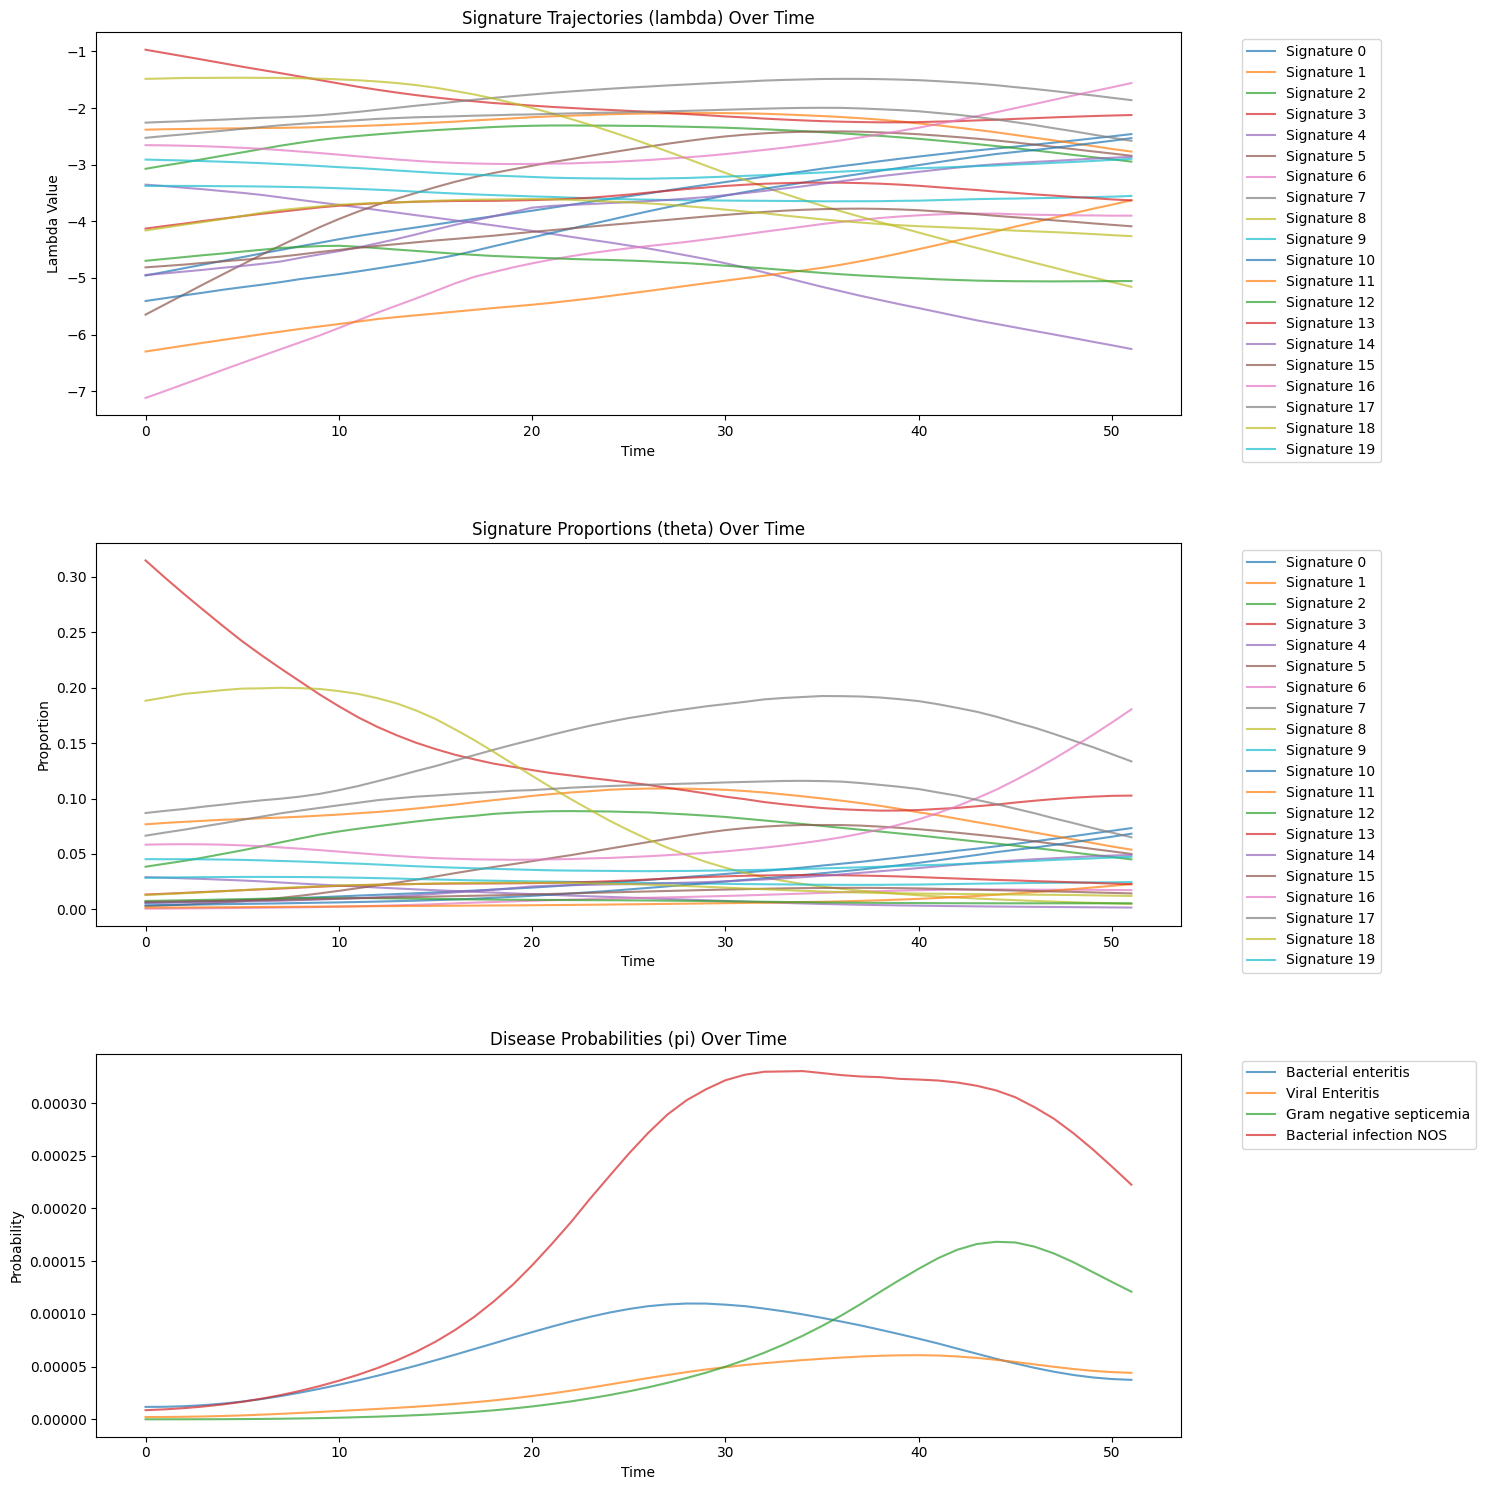

In [6]:

# Create digital twin manager
twin_manager = DigitalTwin(model, disease_names=checkpoint['disease_names'])

# Example 1: Create a digital twin for a new individual
# Generate a random genetic profile (replace with real data)
random_genetic_profile = np.random.randn(model.P)
twin_data = twin_manager.create_twin(random_genetic_profile)

# Plot the twin's trajectories
twin_manager.plot_twin_trajectories(twin_data, selected_diseases=[0, 1, 2, 3])


# Example 2: Simulate an intervention
# Let's say we want to reduce the effect of signature 0 by 30%

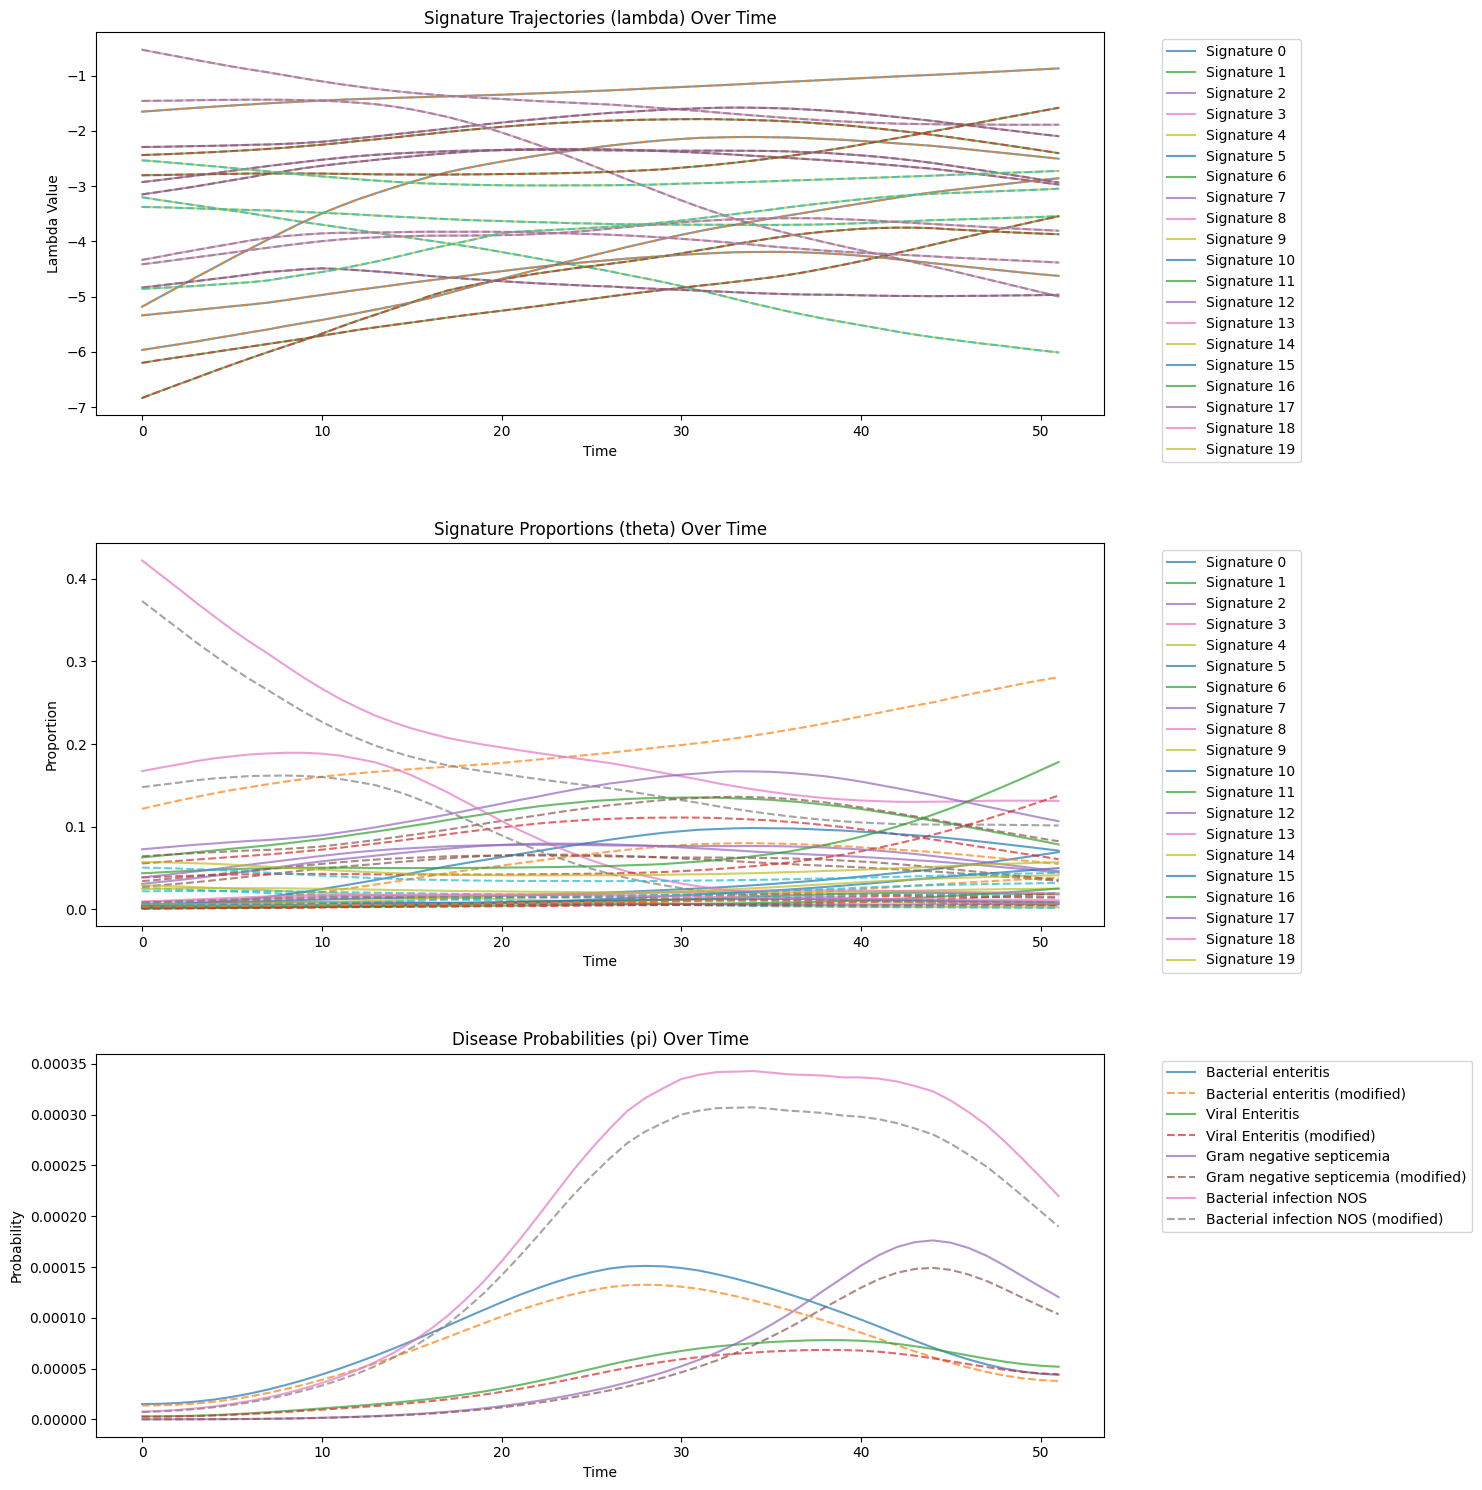

In [13]:

intervention_data = twin_manager.simulate_intervention(
    twin_data,
    intervention_type='reduce',
    target_signature=0,
    effect_size=0.3
)

# Plot original vs intervention trajectories
twin_manager.plot_twin_trajectories(
    twin_data,
    modified_data=intervention_data,
    selected_diseases=[0, 1, 2, 3]
)



# Example 3: Compare two different genetic profiles
# Create another twin with different genetic profile


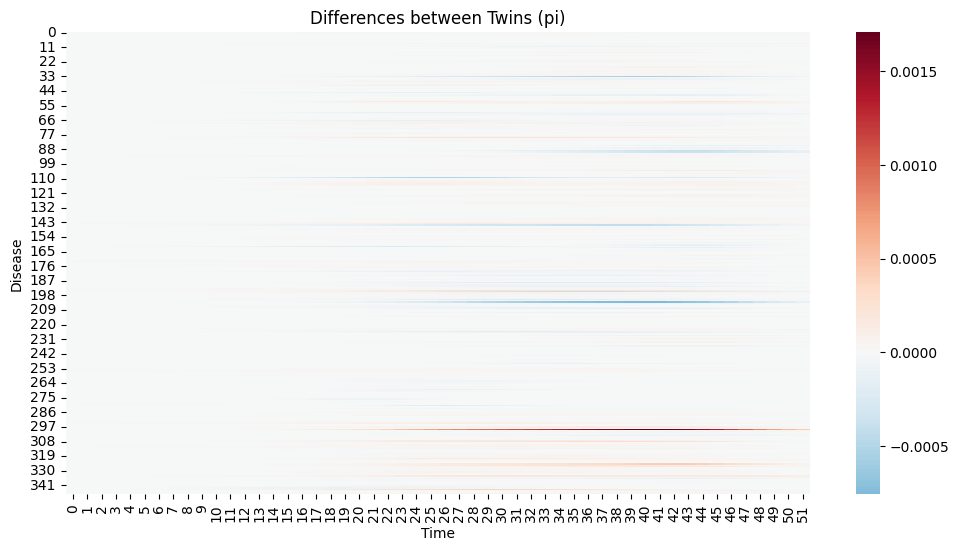


Mean differences in disease probabilities:
Disease 0: 0.0000
Disease 1: 0.0000
Disease 2: -0.0000
Disease 3: -0.0000
Disease 4: -0.0000
Disease 5: -0.0000
Disease 6: -0.0000
Disease 7: 0.0000
Disease 8: 0.0000
Disease 9: -0.0000
Disease 10: -0.0000
Disease 11: -0.0000
Disease 12: -0.0000
Disease 13: 0.0000
Disease 14: 0.0000
Disease 15: 0.0000
Disease 16: 0.0000
Disease 17: 0.0000
Disease 18: -0.0000
Disease 19: -0.0000
Disease 20: -0.0000
Disease 21: -0.0000
Disease 22: 0.0000
Disease 23: -0.0000
Disease 24: 0.0000
Disease 25: 0.0000
Disease 26: 0.0000
Disease 27: 0.0000
Disease 28: 0.0000
Disease 29: 0.0000
Disease 30: 0.0000
Disease 31: 0.0000
Disease 32: 0.0000
Disease 33: -0.0002
Disease 34: 0.0000
Disease 35: -0.0000
Disease 36: 0.0000
Disease 37: 0.0000
Disease 38: 0.0000
Disease 39: 0.0000
Disease 40: -0.0000
Disease 41: -0.0000
Disease 42: 0.0000
Disease 43: 0.0000
Disease 44: 0.0000
Disease 45: -0.0000
Disease 46: -0.0000
Disease 47: -0.0001
Disease 48: -0.0000
Disease 49: -

In [14]:

another_genetic_profile = np.random.randn(model.P)
twin2_data = twin_manager.create_twin(another_genetic_profile)

# Compare the twins
comparison = twin_manager.compare_twins(twin_data, twin2_data, metric='pi')
print("\nMean differences in disease probabilities:")
for d, diff in enumerate(comparison['mean_difference']):
    print(f"Disease {d}: {diff:.4f}")


In [18]:
model.clusters[111:115]

array([5, 5, 5, 5], dtype=int32)

/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)


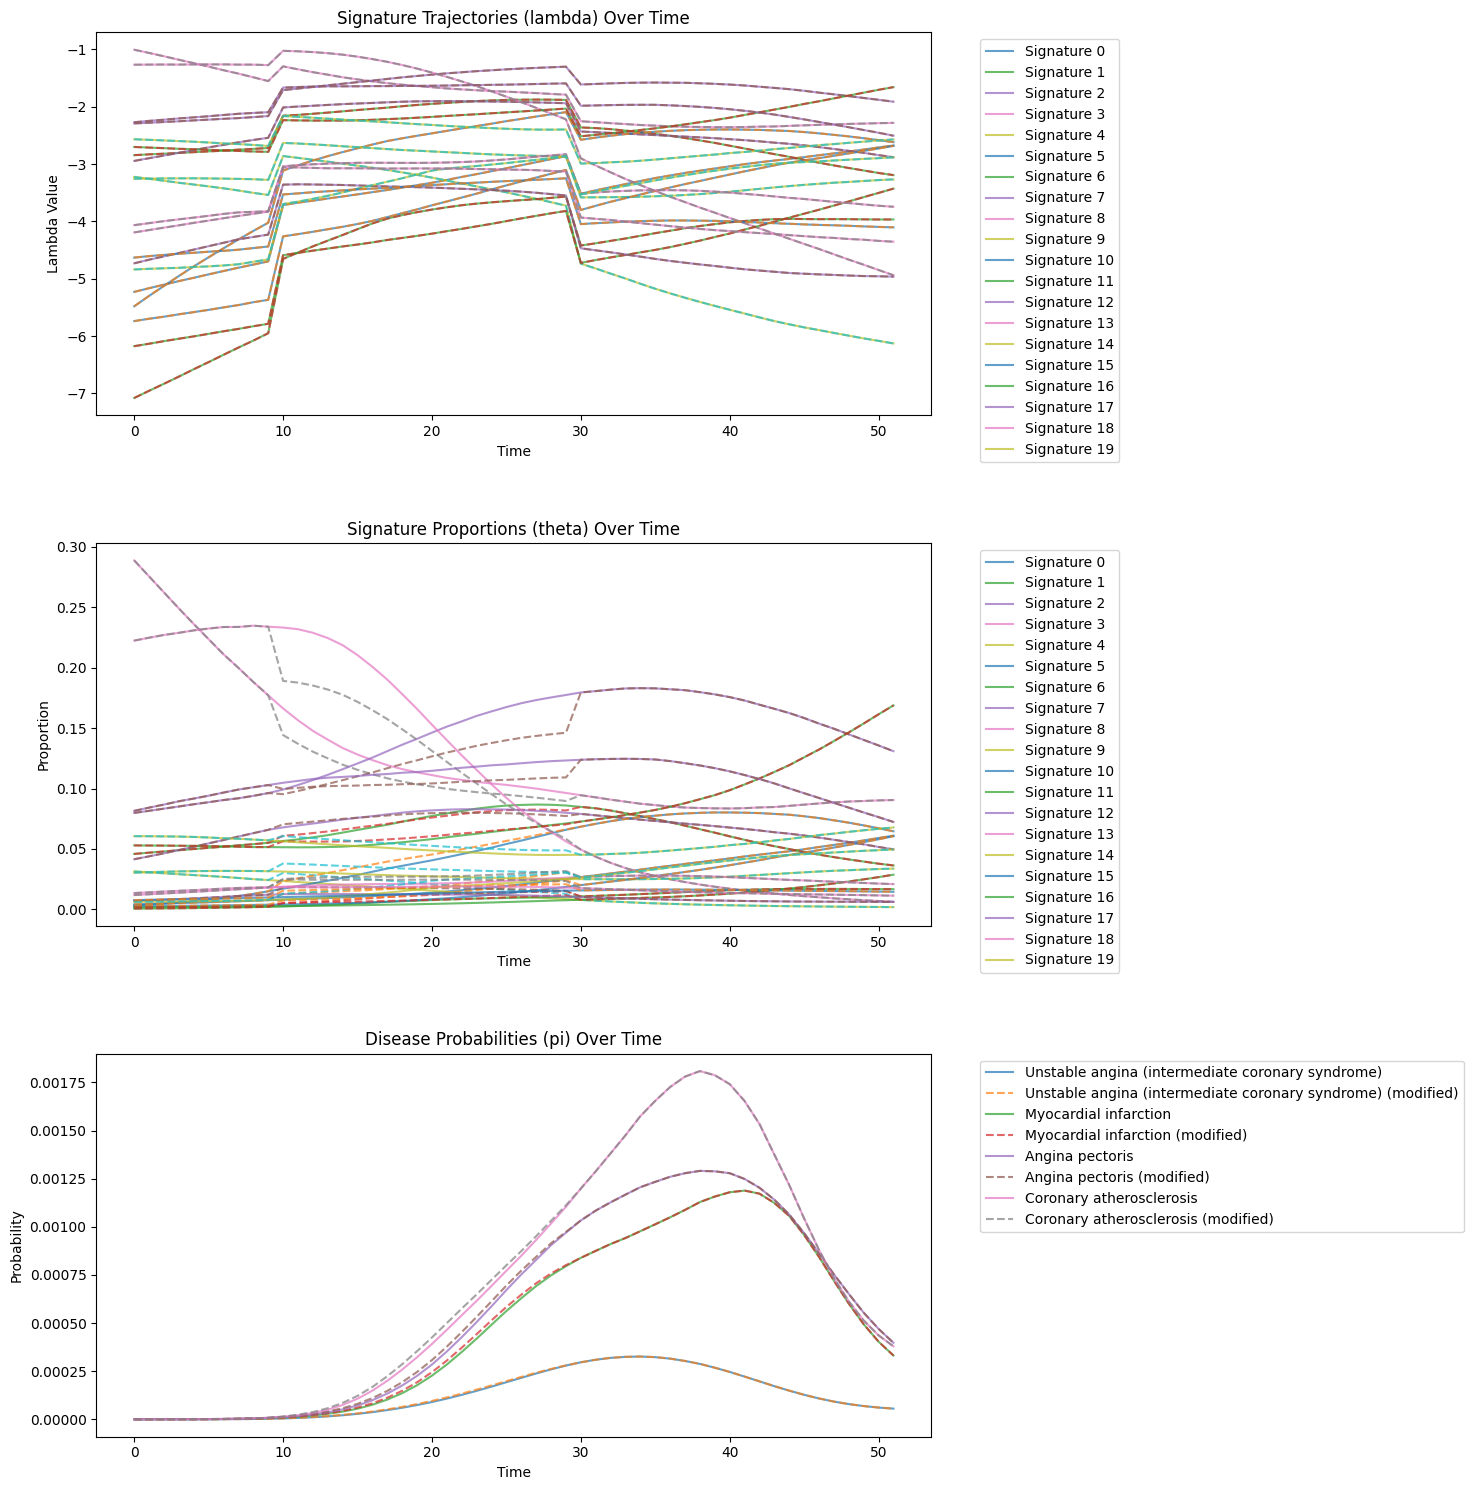

In [15]:
# Example 4: Simulate multiple interventions
# Create a twin with high cardiovascular risk
high_cv_risk_profile = np.random.randn(model.P)
high_cv_risk_profile[0:5] += 2  # Increase some genetic factors
cv_twin = twin_manager.create_twin(high_cv_risk_profile)

# Simulate lifestyle intervention (reducing multiple signatures)
lifestyle_intervention = twin_manager.simulate_intervention(
    cv_twin,
    intervention_type='reduce',
    target_signature=None,  # Affects all signatures
    effect_size=0.2,
    start_time=10,  # Start at time 10
    end_time=30     # End at time 30
)

# Plot the effect of lifestyle intervention
twin_manager.plot_twin_trajectories(
    cv_twin,
    modified_data=lifestyle_intervention,
    selected_diseases=[111,112,113,114]
) 

Plotting diseases 111-115 with intervention on signature 5 (20% reduction)...


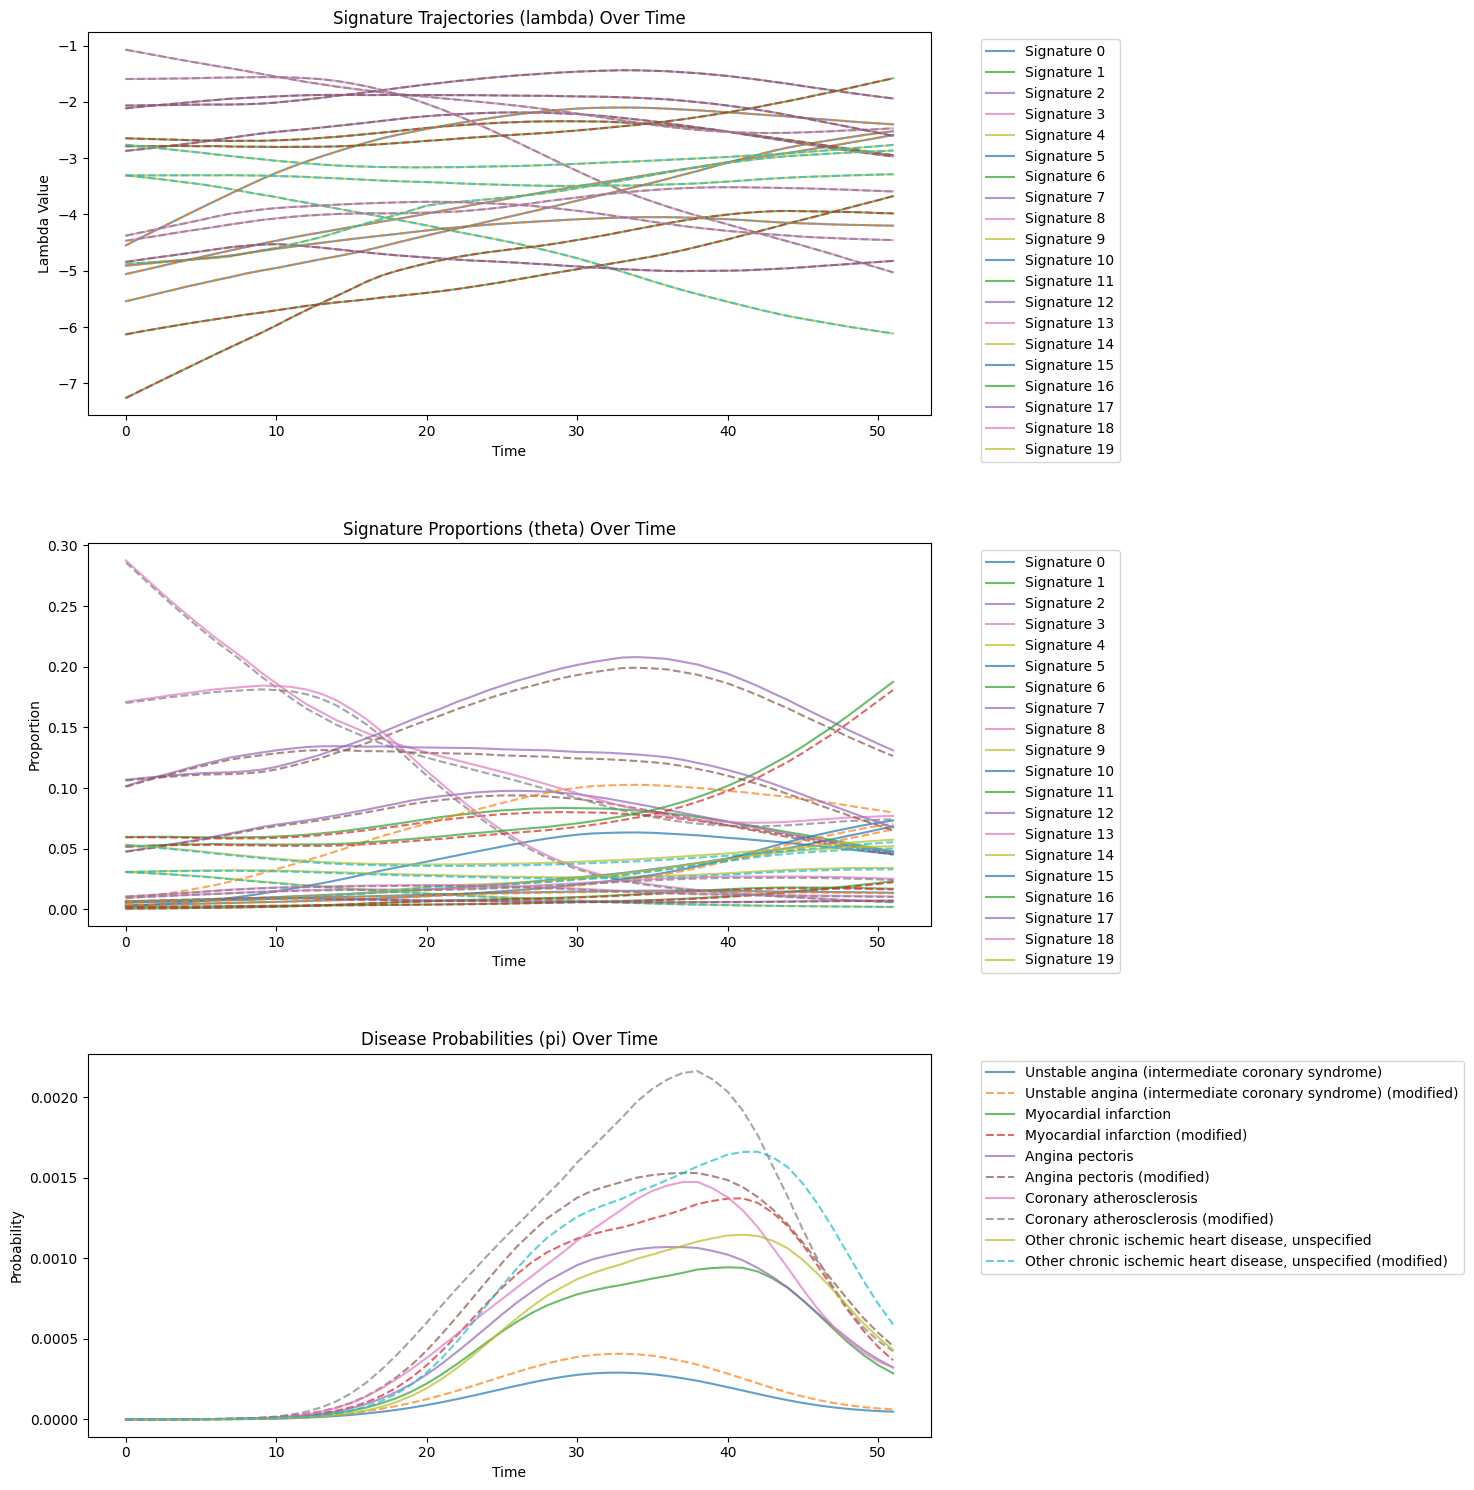

In [16]:
# Example: Plot diseases 111-115 and simulate an intervention reducing signature 5 by 20%
selected_diseases = [111, 112, 113, 114, 115]

# Create a digital twin for a random genetic profile
random_genetic_profile = np.random.randn(model.P)
twin_data = twin_manager.create_twin(random_genetic_profile)

# Simulate intervention: reduce signature 5 by 20%
modified_data = twin_manager.simulate_intervention(
    twin_data,
    intervention_type='reduce',
    target_signature=5,
    effect_size=0.2
)

# Plot the selected diseases before and after intervention
print("Plotting diseases 111-115 with intervention on signature 5 (20% reduction)...")
twin_manager.plot_twin_trajectories(
    twin_data,
    modified_data=modified_data,
    selected_diseases=selected_diseases
) 